In [8]:
%matplotlib inline
import pyfolio as pf
from pyfolio import timeseries
from pyfolio.utils import APPROX_BDAYS_PER_MONTH
from pyfolio import tears
from pyfolio import bayesian

In [9]:
stock_rets = pf.utils.get_symbol_rets('FB')

In [10]:
rolling_window = APPROX_BDAYS_PER_MONTH * 6
rolling_beta = timeseries.rolling_fama_french(
    stock_rets,
    rolling_window=rolling_window)


In [4]:
len(rolling_beta.dropna())

804

In [5]:
rolling_beta.shape

(866, 3)

In [6]:
ok = bayesian.model_returns_t_alpha_beta(stock_rets, rolling_beta, samples=2000)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.2 sec

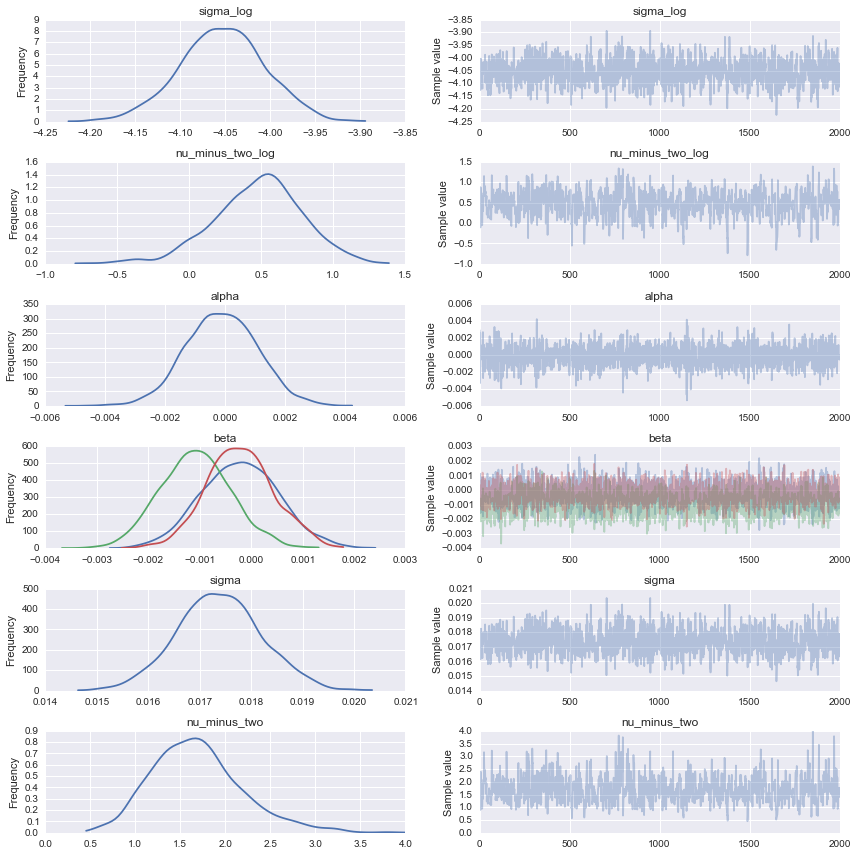

In [7]:
import pymc3 as pm
pm.traceplot(ok);

In [1]:
out_of_sample = stock_rets.index[-40]
tears.create_bayesian_tear_sheet(stock_rets, live_start_date=out_of_sample, benchmark_rets=rolling_beta)

NameError: name 'stock_rets' is not defined

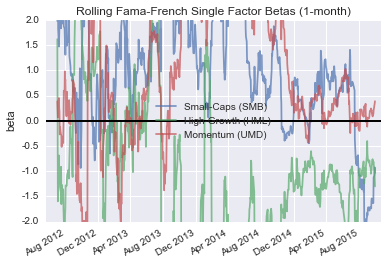

In [9]:
pf.plotting.plot_rolling_fama_french(stock_rets, rolling_window=30)